In [4]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
plt.style.use('dark_background')

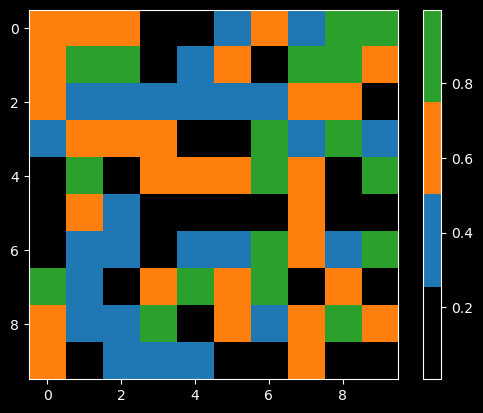

In [5]:
# Define a list of colors
colors = ['black', 'tab:blue', 'tab:orange', 'tab:green']

# Create a custom colormap
data = np.random.rand(10, 10)
the_cmap = ListedColormap(colors)

# Use the custom colormap
plt.imshow(data, cmap=the_cmap)
plt.colorbar()
plt.show()

In [6]:
def plot_lines(ax, i, j, d):
    ax.plot([j,j],[i,i],[0,d], color='gray', linewidth=0.5, zorder=0)
    ax.plot([0,d],[j,j],[i,i], color='gray', linewidth=0.5, zorder=0)
    ax.plot([i,i],[0,d],[j,j], color='gray', linewidth=0.5, zorder=0)    
    return ax

In [7]:
def scatter_3D(data, ax, title):
    x = np.indices(data.shape)[0]
    y = np.indices(data.shape)[1]
    z = np.indices(data.shape)[2]
    col = data.flatten()
    
    # 3D Plot
    p3d = ax.scatter(x, y, z, c=col, cmap=the_cmap, vmin=0, vmax=3, s=200, zorder=1)
    plt.colorbar(p3d, label="Spin")
    ax.set_title(title)

    # make a grid
    for i in range(3):
        for j in range(3):
            plot_lines(ax, i+1, j+1, 4)
    
    # make the panes transparent
    ax.xaxis.set_pane_color('black')
    ax.yaxis.set_pane_color('black')
    ax.zaxis.set_pane_color('black')

    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  'black'
    ax.yaxis._axinfo["grid"]['color'] =  'black'
    ax.zaxis._axinfo["grid"]['color'] =  'black'

    ax.set_axis_off()

    return

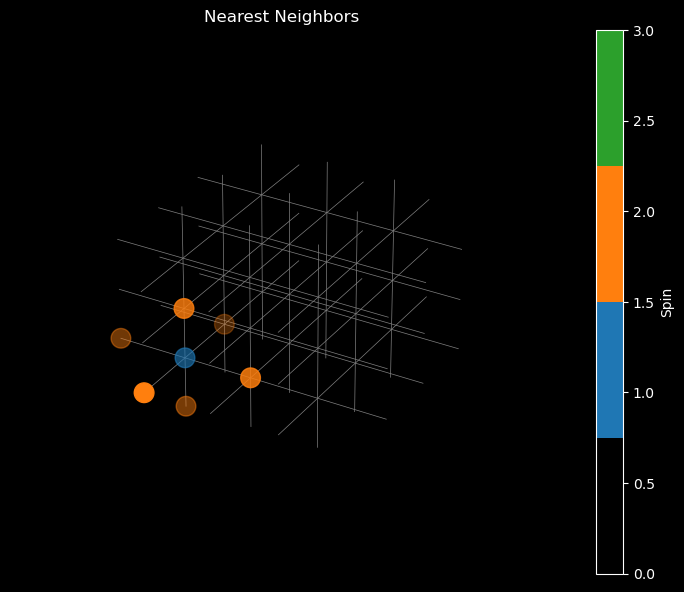

In [8]:
# nearest neighbors:
L = 3
array = np.full((L, L, L), np.nan)

i = 1
j = 1
k = 1

array[i,j,k] = 1

array[i+1, j, k] = 2
array[i, j+1, k] = 2
array[i, j, k+1] = 2
array[i-1, j, k] = 2
array[i, j-1, k] = 2
array[i, j, k-1] = 2

fig = plt.figure(figsize=(24, 24))
ax0 = fig.add_subplot(3, 2, 1, projection='3d')
scatter_3D(array, ax0, "Nearest Neighbors")

plt.show()
plt.close()

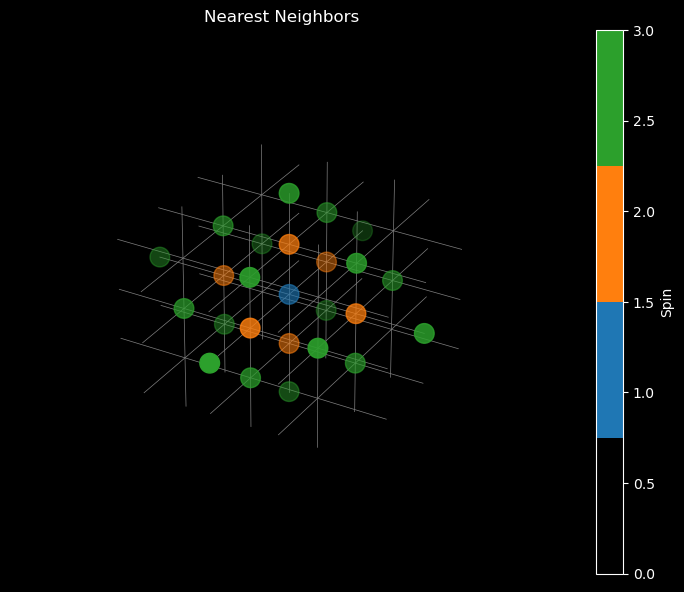

In [9]:
# next nearest neighbors:
L = 5
array = np.full((L, L, L), np.nan)

i = 2
j = 2
k = 2

array[i,j,k] = 1

def adjust_points(array, d, n):
    array[i+d, j, k] = n
    array[i, j+d, k] = n
    array[i, j, k+d] = n
    array[i-d, j, k] = n
    array[i, j-d, k] = n
    array[i, j, k-d] = n
    return

adjust_points(array, 1, 2)
adjust_points(array, 2, 3)

array[i+1, j+1, k] = 3
array[i, j+1, k+1] = 3
array[i+1, j, k+1] = 3
array[i-1, j-1, k] = 3
array[i, j-1, k-1] = 3
array[i-1, j, k-1] = 3

array[i-1, j+1, k] = 3
array[i, j-1, k+1] = 3
array[i+1, j, k-1] = 3
array[i+1, j-1, k] = 3
array[i, j+1, k-1] = 3
array[i-1, j, k+1] = 3

fig = plt.figure(figsize=(24, 24))
ax0 = fig.add_subplot(3, 2, 1, projection='3d')
scatter_3D(array, ax0, "Nearest Neighbors")

plt.show()
plt.close()

In [11]:
def scatter_2D(data, ax, title):
    x = np.indices(data.shape)[0]
    y = np.indices(data.shape)[1]
    col = data.flatten()
    
    
    # 2D Plot
    ax.grid(True, color='gray')
    # ax.plot([1, 3], [2, 2], color='gray', zorder=0, linewidth=1)
    # ax.plot([2, 2], [1, 3], color='gray', zorder=0, linewidth=1)
    # ax.plot([1, 1], [1, 3], color='gray', zorder=0)
    # ax.plot([1, 1], [1, 3], color='gray', zorder=0)
    # ax.plot([1, 3], [1, 1], color='gray', zorder=0)
    # ax.plot([3, 3], [1, 3], color='gray', zorder=0)
    # ax.plot([1, 3], [3, 3], color='gray', zorder=0)



    p2d = ax.scatter(x, y, c=col, cmap=the_cmap, vmin=0, vmax=3, s=200, zorder=1)
    plt.colorbar(p2d, label="Spin")
    ax.set_title(title)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_yticks([0, 1, 2, 3, 4])

    ax.set_axisbelow(True)

    return

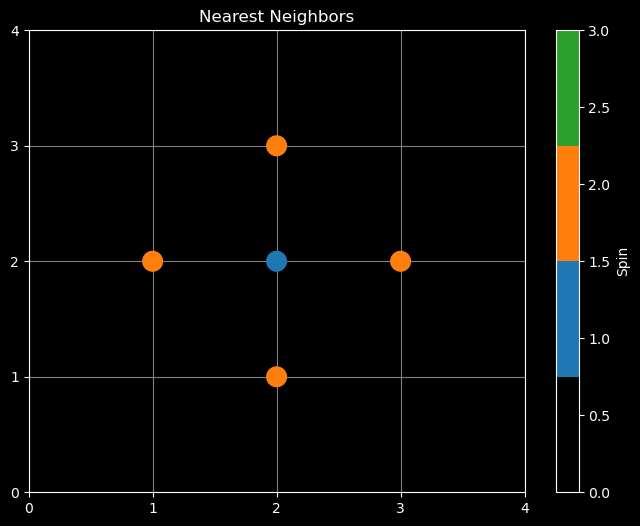

In [13]:
# next nearest neighbors:
L = 5
array = np.full((L, L), np.nan)

i = 2
j = 2
k = 2

array[i,j] = 1

def adjust_points(array, d, n):
    array[i+d, j] = n
    array[i, j+d] = n
    array[i-d, j] = n
    array[i, j-d] = n
    return

adjust_points(array, 1, 2)
# adjust_points(array, 2, 3)

# array[i+1, j-1] = 3
# array[i-1, j+1] = 3
# array[i-1, j-1] = 3
# array[i+1, j+1] = 3

fig = plt.figure(figsize=(8, 6))
ax0 = fig.add_subplot(1, 1, 1)
scatter_2D(array, ax0, "Nearest Neighbors")

plt.show()
plt.close()